# Gradient Descent (Lineal Regresion)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

(400, 1) (100, 1)


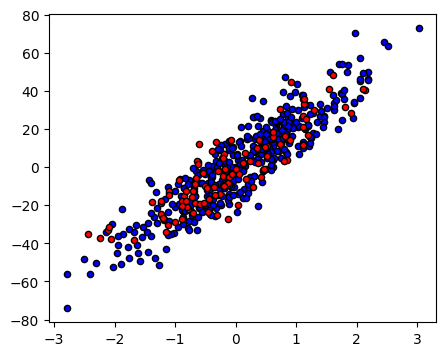

In [2]:
X, y = make_regression(n_samples = 500, n_features = 1 , noise = 10, random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

_, ax = plt.subplots (figsize=(5,4))
ax.scatter( X_train , y_train , c='b', edgecolors='k', s=20)
ax.scatter( X_test  , y_test  , c='r', edgecolors='k', s=20)
print (X_train.shape, X_test.shape)

In [3]:
def mse (y_true, y_pred):
  return np.square(y_true - y_pred).mean()

Useful definitions:

$\Large{y = mx_i + b }$ \\

$\mathcal{L}(y, \hat{y}) = \Large{\frac{1}{n} \sum^{n}_{i=1} (y_i - \hat{y}_i)^2 }$

$\mathcal{L}(y, \hat{y}) = \Large{\frac{1}{n} \sum^{n}_{i=1} (y_i - (mx_i + b))^2 }$


In [4]:
# Parameter definition
epochs = 100
learning_rate = 0.1
stop_criteria = 1e-3

# Initial values
m = 0
b = 0

# Additional options
display_step = 5
steps = len(X_train)
loss = []

# Optimization process
for epoch in range(epochs) :
    # Gradient initialization
    m_gradient  = 0
    b_gradient  = 0
    total_error = 0

    # Compute error and gradients
    for i in range(0, steps ):
        #
        prediction = m * X_train[i] + b
        error = mse(y_train[i], prediction)

        # Compute the gradients
        m_gradient -= (y_train[i] - prediction) * X_train[i]
        b_gradient -= (y_train[i] - prediction)
        total_error += error

    m_gradient = (2 / steps) * m_gradient
    b_gradient = (2 / steps) * b_gradient

    # Update params
    m = m - (learning_rate * m_gradient )
    b = b - (learning_rate * b_gradient )

    # Save average error as loss
    loss.append(total_error / steps)

    # Show everything every display_step epochs
    if epoch % display_step == 0:
        plt.scatter(X_train, y_train)
        # line between min-max--points
        pred_x = [min(X_train), max(X_train)]
        pred_y = [m * min(X_train) + b, m * max(X_train) + b ]
        plt.title('Epoch: {0}, MSE: {1}'.format(epoch, total_error / steps))
        plt.plot(pred_x, pred_y, "r")
        plt.show()
        plt.pause(1)
        clear_output(wait=False)

    # Convergence condition
    if max(abs(learning_rate * m_gradient), abs(learning_rate * b_gradient)) < stop_criteria:
        break


# Impresión de los resultados
print("Computed values are: ", m, b)
print("Finished in ", epoch, " epochs ")

Computed values are:  [22.16992054] [-0.0460123]
Finished in  40  epochs 


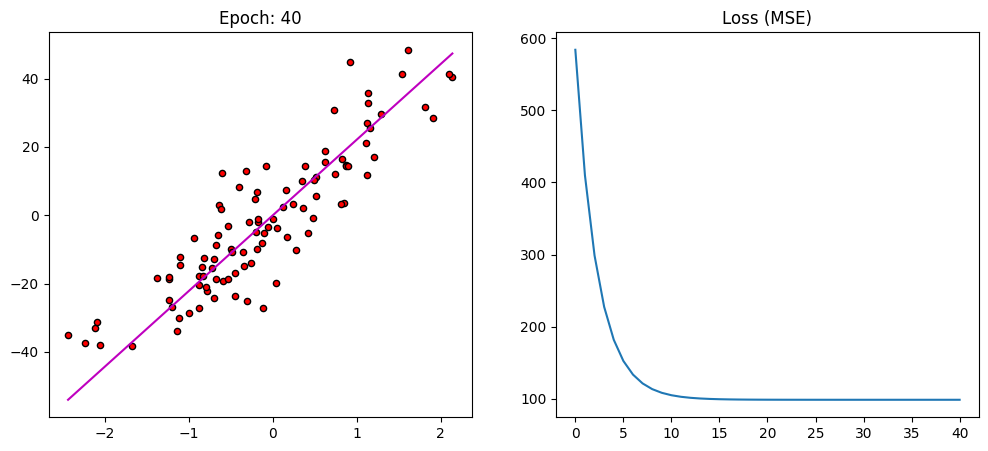

In [5]:
pred_x = [min(X_test), max(X_test)]
pred_y = [m * min(X_test) + b , m * max(X_test) + b]


_, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].scatter( X_test , y_test , edgecolors='k', c='r', s=20)
axes[0].set_title('Epoch: {0}'.format(epoch))
axes[0].plot( pred_x , pred_y , "m")

# plotting the loss
axes[1].plot(range(0, len(loss)), loss), axes[1].set_title("Loss (MSE)")
plt.show()

## Putting everything together

In [6]:
# Definición de la clase de regresión lineal
class our_linear_model():
    def __init__(self, m=1, b=1, learning_rate=0.1, stop_criteria=1e-3):
        self.m_ = m
        self.b_ = b
        self.learning_rate = learning_rate
        self.stop_criteria = stop_criteria
        self.loss = []

    def predict(self, x):
        return self.m_ * x + self.b_

    def mse(self, y_true, y_pred):
        return np.square(y_true - y_pred).mean()

    def gradient_step(self, m_gradient, b_gradient):
        self.m_ = self.m_ - (self.learning_rate * m_gradient)
        self.b_ = self.b_ - (self.learning_rate * b_gradient)

    def fit(self, X, y, epochs=100, display_step=5):
        steps = len(X)
        for epoch in range(epochs):
            # Inicialización del gradiente y error total
            m_gradient, b_gradient, total_error = 0, 0, 0

            # Cálculo del error y los gradientes
            for i in range(steps):
                prediction = self.predict(X[i])
                error = self.mse(y[i], prediction)
                m_gradient -= (y[i] - prediction) * X[i]
                b_gradient -= (y[i] - prediction)
                total_error += error

            m_gradient = (2 / steps) * m_gradient
            b_gradient = (2 / steps) * b_gradient

            # Actualización de los parámetros
            self.gradient_step(m_gradient, b_gradient)

            # Guardar el error medio como pérdida
            self.loss.append(total_error / steps)

            # Visualización cada display_step épocas
            if epoch % display_step == 0:
                plt.scatter(X, y)
                pred_x = [min(X), max(X)]
                pred_y = [self.predict(min(X)), self.predict(max(X))]
                plt.title(f'Epoch: {epoch}, MSE: {total_error / steps}')
                plt.plot(pred_x, pred_y, "r")
                plt.show()
                plt.pause(1)
                clear_output(wait=False)

            # Condición de convergencia
            if max(abs(self.learning_rate * m_gradient), abs(self.learning_rate * b_gradient)) < self.stop_criteria:
                break

In [7]:
# Creación y entrenamiento del modelo
model = our_linear_model()
model.fit(X_train, y_train)

# Impresión de los parámetros aprendidos
print("Computed values are: ", model.m_, model.b_)

Computed values are:  [22.16997028] [-0.04597807]


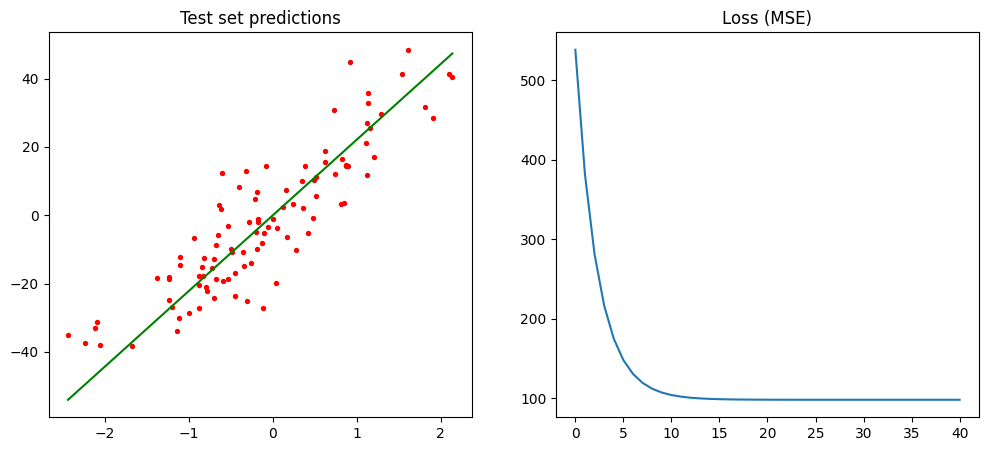

In [8]:
# Predicción y visualización de los resultados
pred_x = [min(X_test), max(X_test)]
pred_y = [model.predict(min(X_test)), model.predict(max(X_test))]

_, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X_test, y_test, c='r', s=8)
axes[0].plot(pred_x, pred_y, "g")
axes[0].set_title("Test set predictions")

# Visualización de la pérdida
axes[1].plot(range(len(model.loss)), model.loss)
axes[1].set_title("Loss (MSE)")
plt.show()